In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

#üìå**1- Extracci√≥n**

In [40]:
url = 'https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json'
clientes = pd.read_json(url)

#üîß**2- Transformaci√≥n**

##**2.1- Visi√≥n general del DataFrame**

In [41]:
clientes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


In [42]:
clientes.dtypes

customerID    object
Churn         object
customer      object
phone         object
internet      object
account       object
dtype: object

In [43]:
clientes.head()

customerID Churn                                           customer  \
0  0002-ORFBO    No  {'gender': 'Female', 'SeniorCitizen': 0, 'Part...   
1  0003-MKNFE    No  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
2  0004-TLHLJ   Yes  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
3  0011-IGKFF   Yes  {'gender': 'Male', 'SeniorCitizen': 1, 'Partne...   
4  0013-EXCHZ   Yes  {'gender': 'Female', 'SeniorCitizen': 1, 'Part...   

                                             phone  \
0   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
1  {'PhoneService': 'Yes', 'MultipleLines': 'Yes'}   
2   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
3   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
4   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   

                                            internet  \
0  {'InternetService': 'DSL', 'OnlineSecurity': '...   
1  {'InternetService': 'DSL', 'OnlineSecurity': '...   
2  {'InternetService': 'Fiber optic', 'OnlineSecu...   
3  {'InternetService': 'Fiber optic', 'OnlineSecu...   
4  {'InternetService': 'Fiber optic', 'OnlineSecu...   

                                             account  
0  {'Contract': 'One year', 'PaperlessBilling': '...  
1  {'Contract': 'Month-to-month', 'PaperlessBilli...  
2  {'Contract': 'Month-to-month', 'PaperlessBilli...  
3  {'Contract': 'Month-to-month', 'PaperlessBilli...  
4  {'Contract': 'Month-to-month', 'PaperlessBilli...

Observaciones:
- El DataFrame tiene 6 columnas de tipo "object".
- El DataFrame tiene 7267 filas, ninguna tiene valores nulos.
- 4 de las 6 columnas tienen diccionarios/objetos anidados.

##**2.2- Normalizaci√≥n del DataFrame**

In [44]:
clientes_customer_norm = pd.json_normalize(clientes['customer'])
clientes_customer_norm = clientes_customer_norm.add_prefix('customer.')

In [45]:
clientes_phone_norm = pd.json_normalize(clientes['phone'])
clientes_phone_norm = clientes_phone_norm.add_prefix('phone.')

In [46]:
clientes_internet_norm = pd.json_normalize(clientes['internet'])
clientes_internet_norm = clientes_internet_norm.add_prefix('internet.')

In [47]:
clientes_account_norm = pd.json_normalize(clientes['account'])
clientes_account_norm = clientes_account_norm.add_prefix('account.')

In [48]:
clientes_sin_columnas_anidadas = clientes.drop(columns=['customer', 'phone', 'internet', 'account'])

In [49]:
clientes = pd.concat([clientes_sin_columnas_anidadas,clientes_customer_norm,clientes_phone_norm,clientes_internet_norm,
                      clientes_account_norm],axis=1)

##**2.3- Visi√≥n general del DataFrame normalizado**

In [50]:
clientes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

In [51]:
clientes.dtypes

customerID                    object
Churn                         object
customer.gender               object
customer.SeniorCitizen         int64
customer.Partner              object
customer.Dependents           object
customer.tenure                int64
phone.PhoneService            object
phone.MultipleLines           object
internet.InternetService      object
internet.OnlineSecurity       object
internet.OnlineBackup         object
internet.DeviceProtection     object
internet.TechSupport          object
internet.StreamingTV          object
internet.StreamingMovies      object
account.Contract              object
account.PaperlessBilling      object
account.PaymentMethod         object
account.Charges.Monthly      float64
account.Charges.Total         object
dtype: object

In [52]:
clientes.head()

customerID Churn customer.gender  customer.SeniorCitizen customer.Partner  \
0  0002-ORFBO    No          Female                       0              Yes   
1  0003-MKNFE    No            Male                       0               No   
2  0004-TLHLJ   Yes            Male                       0               No   
3  0011-IGKFF   Yes            Male                       1              Yes   
4  0013-EXCHZ   Yes          Female                       1              Yes   

  customer.Dependents  customer.tenure phone.PhoneService phone.MultipleLines  \
0                 Yes                9                Yes                  No   
1                  No                9                Yes                 Yes   
2                  No                4                Yes                  No   
3                  No               13                Yes                  No   
4                  No                3                Yes                  No   

  internet.InternetService  ... internet.OnlineBackup  \
0                      DSL  ...                   Yes   
1                      DSL  ...                    No   
2              Fiber optic  ...                    No   
3              Fiber optic  ...                   Yes   
4              Fiber optic  ...                    No   

  internet.DeviceProtection internet.TechSupport internet.StreamingTV  \
0                        No                  Yes                  Yes   
1                        No                   No                   No   
2                       Yes                   No                   No   
3                       Yes                   No                  Yes   
4                        No                  Yes                  Yes   

  internet.StreamingMovies account.Contract account.PaperlessBilling  \
0                       No         One year                      Yes   
1                      Yes   Month-to-month                       No   
2                       No   Month-to-month                      Yes   
3                      Yes   Month-to-month                      Yes   
4                       No   Month-to-month                      Yes   

  account.PaymentMethod account.Charges.Monthly  account.Charges.Total  
0          Mailed check                    65.6                  593.3  
1          Mailed check                    59.9                  542.4  
2      Electronic check                    73.9                 280.85  
3      Electronic check                    98.0                1237.85  
4          Mailed check                    83.9                  267.4  

[5 rows x 21 columns]

Observaciones:
- El DataFrame tiene 21 columnas: 18 de tipo "object", dos de tipo "int64" y una  de tipo "float64".
- El DataFrame tiene 7267 filas sin valores nulos.

##**2.4- Comprobaci√≥n de incoherencias en los datos**

###**2.4.1- Comprobaci√≥n de valores ausentes**

In [53]:
cantidad_valores_ausentes = clientes.isnull().sum()
cantidad_valores_ausentes

customerID                   0
Churn                        0
customer.gender              0
customer.SeniorCitizen       0
customer.Partner             0
customer.Dependents          0
customer.tenure              0
phone.PhoneService           0
phone.MultipleLines          0
internet.InternetService     0
internet.OnlineSecurity      0
internet.OnlineBackup        0
internet.DeviceProtection    0
internet.TechSupport         0
internet.StreamingTV         0
internet.StreamingMovies     0
account.Contract             0
account.PaperlessBilling     0
account.PaymentMethod        0
account.Charges.Monthly      0
account.Charges.Total        0
dtype: int64

Observaciones:
- El DataFrame no tiene valores ausentes

###**2.4.2- Comprobaci√≥n de valores duplicados**

In [54]:
cantidad_filas_duplicadas = clientes.duplicated().sum()
cantidad_filas_duplicadas

np.int64(0)

Observaciones:
- El DataFrame no tiene filas duplicadas.

###**2.4.3- Modificaci√≥n de formatos**

####**2.4.3.1- Modificaci√≥n de las columnas binarias  de tipo "object" a tipo "bool"**

In [55]:
boolean_cols = [
    'Churn', 'customer.Partner', 'customer.Dependents',
    'phone.PhoneService', 'account.PaperlessBilling'
]

for col in boolean_cols:
    clientes[col] = (
        clientes[col]
        .astype(str)            # Asegura que sea string
        .str.strip()            # Elimina espacios
        .replace('', pd.NA)     # Reemplaza cadenas vac√≠as por NaN
        .str.lower()            # Pasa a min√∫scula
        .map({'yes': True, 'no': False})
    )

####**2.4.3.2- Modificaci√≥n de las columna "customer.SeniorCitizen" de tipo "int64" a tipo "bool"**

In [56]:
clientes['customer.SeniorCitizen'] = clientes['customer.SeniorCitizen'].astype(bool)

####**2.4.3.3- Modificaci√≥n de las columna "customerId" de tipo "object" a tipo "string"**

In [57]:
clientes['customerID'] = clientes['customerID'].astype('string')

####**2.4.3.4- Modificaci√≥n de las columnas de tipo "object" a tipo "category"**

In [58]:
category_cols = [
    'customer.gender', 'phone.MultipleLines',
    'internet.InternetService', 'account.Contract',
    'account.PaymentMethod','internet.OnlineSecurity', 'internet.OnlineBackup',
    'internet.DeviceProtection', 'internet.TechSupport',
    'internet.StreamingTV', 'internet.StreamingMovies'
]

for col in category_cols:
    clientes[col] = clientes[col].astype('category')

####**2.4.3.5- Modificaci√≥n de la columna "account.Charges.Total" de tipo "object" a tipo "float64"**

In [59]:
clientes['account.Charges.Total'] = pd.to_numeric(clientes['account.Charges.Total'], errors='coerce')

####**2.4.3.5- Resultado parcial**

In [60]:
clientes.dtypes

customerID                   string[python]
Churn                                object
customer.gender                    category
customer.SeniorCitizen                 bool
customer.Partner                       bool
customer.Dependents                    bool
customer.tenure                       int64
phone.PhoneService                     bool
phone.MultipleLines                category
internet.InternetService           category
internet.OnlineSecurity            category
internet.OnlineBackup              category
internet.DeviceProtection          category
internet.TechSupport               category
internet.StreamingTV               category
internet.StreamingMovies           category
account.Contract                   category
account.PaperlessBilling               bool
account.PaymentMethod              category
account.Charges.Monthly             float64
account.Charges.Total               float64
dtype: object

In [61]:
clientes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   customerID                 7267 non-null   string  
 1   Churn                      7043 non-null   object  
 2   customer.gender            7267 non-null   category
 3   customer.SeniorCitizen     7267 non-null   bool    
 4   customer.Partner           7267 non-null   bool    
 5   customer.Dependents        7267 non-null   bool    
 6   customer.tenure            7267 non-null   int64   
 7   phone.PhoneService         7267 non-null   bool    
 8   phone.MultipleLines        7267 non-null   category
 9   internet.InternetService   7267 non-null   category
 10  internet.OnlineSecurity    7267 non-null   category
 11  internet.OnlineBackup      7267 non-null   category
 12  internet.DeviceProtection  7267 non-null   category
 13  internet.TechSupport       7267 n

Observaciones:
- Se cambiaron los tipos de datos correctamente salvo en una caso: la columna "Churn". Esto se sucedi√≥ porque conten√≠a alguno valores vac√≠os, los cuales fueron transformados por "NaN".
- Se detect√≥ que en la columnta "account.Total.Charge" tambi√©n hay valores nulos.

####**2.4.3.6- Eliminaci√≥n de las filas que contengan valores "NaN" en la columnas "Churn" y "account.Total.Charges"**

In [62]:
clientes = clientes.dropna(subset=['Churn'])

In [63]:
clientes['Churn'] = clientes['Churn'].astype(bool)

/tmp/ipython-input-63-1516072067.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clientes['Churn'] = clientes['Churn'].astype(bool)


In [64]:
clientes = clientes.dropna(subset=['account.Charges.Total'])

In [65]:
clientes.dtypes

customerID                   string[python]
Churn                                  bool
customer.gender                    category
customer.SeniorCitizen                 bool
customer.Partner                       bool
customer.Dependents                    bool
customer.tenure                       int64
phone.PhoneService                     bool
phone.MultipleLines                category
internet.InternetService           category
internet.OnlineSecurity            category
internet.OnlineBackup              category
internet.DeviceProtection          category
internet.TechSupport               category
internet.StreamingTV               category
internet.StreamingMovies           category
account.Contract                   category
account.PaperlessBilling               bool
account.PaymentMethod              category
account.Charges.Monthly             float64
account.Charges.Total               float64
dtype: object

In [66]:
clientes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   customerID                 7032 non-null   string  
 1   Churn                      7032 non-null   bool    
 2   customer.gender            7032 non-null   category
 3   customer.SeniorCitizen     7032 non-null   bool    
 4   customer.Partner           7032 non-null   bool    
 5   customer.Dependents        7032 non-null   bool    
 6   customer.tenure            7032 non-null   int64   
 7   phone.PhoneService         7032 non-null   bool    
 8   phone.MultipleLines        7032 non-null   category
 9   internet.InternetService   7032 non-null   category
 10  internet.OnlineSecurity    7032 non-null   category
 11  internet.OnlineBackup      7032 non-null   category
 12  internet.DeviceProtection  7032 non-null   category
 13  internet.TechSupport       7032 non-nu

##**2.5- Creaci√≥n de la columna "Cuentas_Diarias"**

In [67]:
clientes.loc[:, 'Cuentas_Diarias'] = clientes['account.Charges.Monthly'] / 30.44

In [68]:
clientes.sample(20)

customerID  Churn customer.gender  customer.SeniorCitizen  \
4123  5651-CPDND  False            Male                   False   
2271  3167-SNQPL  False            Male                    True   
4491  6161-ERDGD  False            Male                   False   
5616  7666-WKRON   True          Female                   False   
3486  4818-QIUFN   True          Female                    True   
3374  4686-GEFRM  False            Male                   False   
6624  9103-TCIHJ   True          Female                   False   
803   1135-LMECX  False          Female                   False   
2278  3177-LASXD   True          Female                   False   
4293  5902-WBLSE  False          Female                   False   
2029  2863-IMQDR  False          Female                   False   
3733  5143-EGQFK   True          Female                    True   
5884  8043-PNYSD  False            Male                   False   
998   1400-MMYXY   True            Male                    True   
2538  3541-ZNUHK  False          Female                   False   
2547  3552-CTCYF  False            Male                   False   
2540  3545-CNWRG  False          Female                   False   
6429  8823-RLPWL  False          Female                   False   
7126  9804-ICWBG   True            Male                   False   
6240  8590-OHDIW  False          Female                   False   

      customer.Partner  customer.Dependents  customer.tenure  \
4123             False                False               10   
2271              True                 True               38   
4491              True                 True               71   
5616             False                False               39   
3486             False                False               20   
3374              True                False               70   
6624             False                False               15   
803              False                False                1   
2278             False                False                1   
4293              True                 True               70   
2029             False                False               61   
3733             False                False               10   
5884              True                 True               63   
998               True                False                3   
2538              True                 True               55   
2547              True                 True               63   
2540              True                 True               49   
6429              True                False               72   
7126             False                False                1   
6240              True                 True               38   

      phone.PhoneService phone.MultipleLines internet.InternetService  ...  \
4123                True                  No                      DSL  ...   
2271                True                 Yes              Fiber optic  ...   
4491                True                 Yes                      DSL  ...   
5616                True                  No              Fiber optic  ...   
3486                True                 Yes              Fiber optic  ...   
3374                True                 Yes              Fiber optic  ...   
6624                True                 Yes                      DSL  ...   
803                 True                  No                       No  ...   
2278                True                  No              Fiber optic  ...   
4293                True                  No                       No  ...   
2029                True                 Yes                      DSL  ...   
3733               False    No phone service                      DSL  ...   
5884                True                  No                       No  ...   
998                 True                 Yes              Fiber optic  ...   
2538                True                 Yes              Fiber optic  ...   
2547 

##**2.6- Cambio de nombres de columnas**

In [69]:
clientes.rename(columns={
    'customerID': 'id_cliente',
    'Churn': 'cancelado',
    'customer.gender': 'cliente_genero',
    'customer.SeniorCitizen': 'cliente_mayor',
    'customer.Partner': 'cliente_con_pareja',
    'customer.Dependents': 'cliente_con_dependientes',
    'customer.tenure': 'cliente_antiguedad',
    'phone.PhoneService': 'telefono_servicio',
    'phone.MultipleLines': 'telefono_lineas_multiples',
    'internet.InternetService': 'internet_servicio',
    'internet.OnlineSecurity': 'internet_seguridad_en_linea',
    'internet.OnlineBackup': 'internet_respaldo_en_linea',
    'internet.DeviceProtection': 'internet_proteccion_dispositivo',
    'internet.TechSupport': 'internet_soporte_tecnico',
    'internet.StreamingTV': 'internet_streaming_tv',
    'internet.StreamingMovies': 'internet_streaming_peliculas',
    'account.Contract': 'cuenta_contrato',
    'account.PaperlessBilling': 'cuenta_facturacion_digital',
    'account.PaymentMethod': 'cuenta_metodo_pago',
    'account.Charges.Monthly': 'cuenta_cargos_mensuales',
    'account.Charges.Total': 'cuenta_cargos_totales'
}, inplace=True)

In [70]:
clientes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype   
---  ------                           --------------  -----   
 0   id_cliente                       7032 non-null   string  
 1   cancelado                        7032 non-null   bool    
 2   cliente_genero                   7032 non-null   category
 3   cliente_mayor                    7032 non-null   bool    
 4   cliente_con_pareja               7032 non-null   bool    
 5   cliente_con_dependientes         7032 non-null   bool    
 6   cliente_antiguedad               7032 non-null   int64   
 7   telefono_servicio                7032 non-null   bool    
 8   telefono_lineas_multiples        7032 non-null   category
 9   internet_servicio                7032 non-null   category
 10  internet_seguridad_en_linea      7032 non-null   category
 11  internet_respaldo_en_linea       7032 non-null   category
 12  internet_pr

##üìä**3- Carga y an√°lisis**

##**3.1- An√°lisis univariado**

###**3.1.1- Variables num√©ricas**


--- cliente_antiguedad ---
count    7032.000000
mean       32.421786
std        24.545260
min         1.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: cliente_antiguedad, dtype: float64
Valores nulos: 0


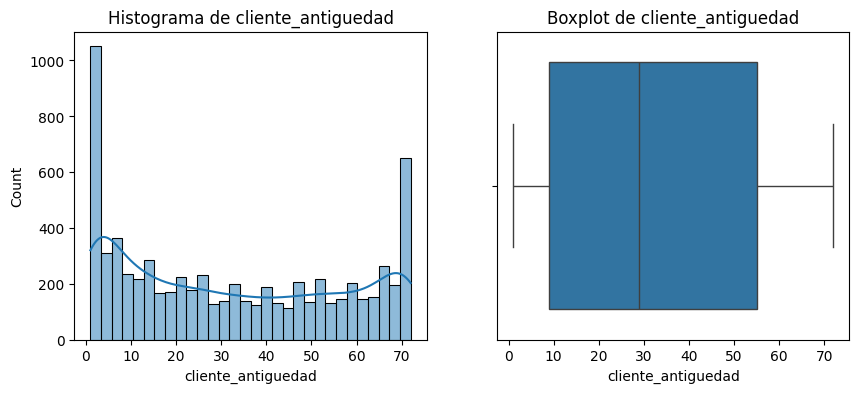


--- cuenta_cargos_mensuales ---
count    7032.000000
mean       64.798208
std        30.085974
min        18.250000
25%        35.587500
50%        70.350000
75%        89.862500
max       118.750000
Name: cuenta_cargos_mensuales, dtype: float64
Valores nulos: 0


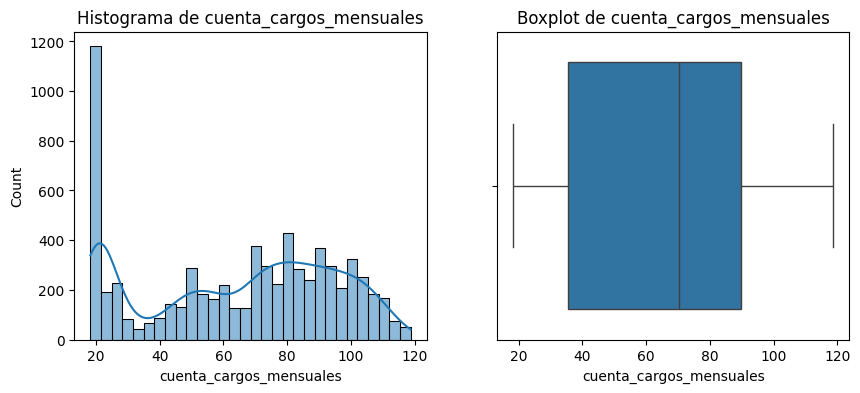


--- cuenta_cargos_totales ---
count    7032.000000
mean     2283.300441
std      2266.771362
min        18.800000
25%       401.450000
50%      1397.475000
75%      3794.737500
max      8684.800000
Name: cuenta_cargos_totales, dtype: float64
Valores nulos: 0


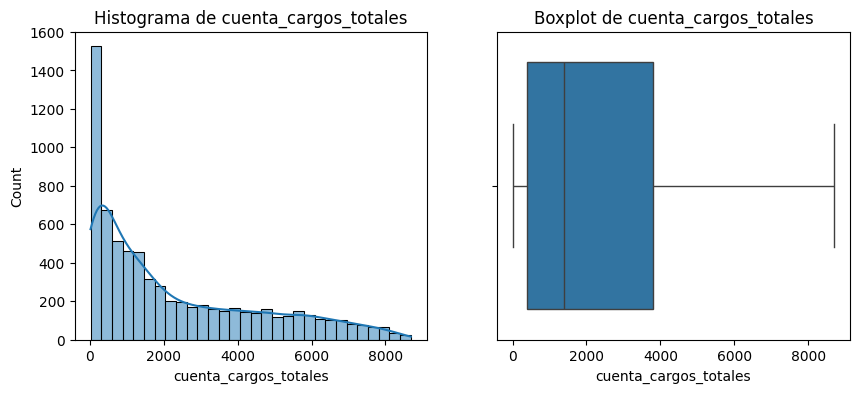


--- Cuentas_Diarias ---
count    7032.000000
mean        2.128719
std         0.988370
min         0.599540
25%         1.169103
50%         2.311104
75%         2.952119
max         3.901117
Name: Cuentas_Diarias, dtype: float64
Valores nulos: 0


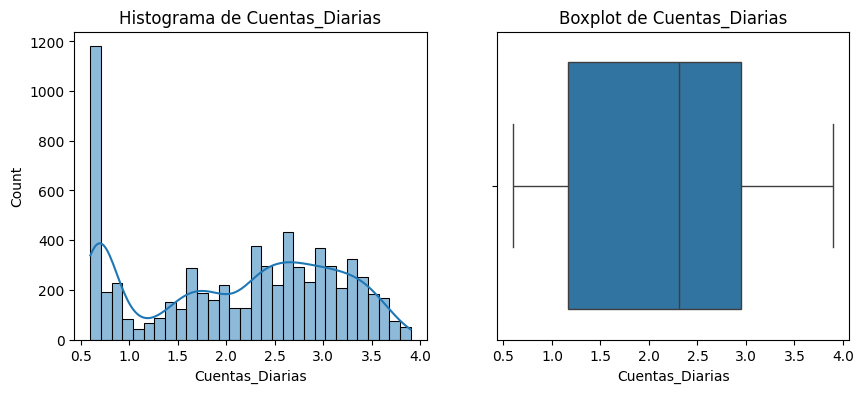

In [71]:
numericas = clientes.select_dtypes(include=['int64', 'float64']).columns

for col in numericas:
    print(f"\n--- {col} ---")
    print(clientes[col].describe())
    print("Valores nulos:", clientes[col].isnull().sum())

    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    sns.histplot(clientes[col], kde=True, bins=30)
    plt.title(f'Histograma de {col}')

    plt.subplot(1, 2, 2)
    sns.boxplot(x=clientes[col])
    plt.title(f'Boxplot de {col}')
    plt.show()

Observaciones:
- La variable cliente_antiguedad muestra una distribuci√≥n amplia de antig√ºedad con valores entre 1 y 72 meses. La media (32.42) es ligeramente mayor que la mediana (29), lo que sugiere una leve asimetr√≠a hacia la derecha. La dispersi√≥n es alta, indicando que los clientes se distribuyen ampliamente en el tiempo de permanencia.
- La variable cuenta_cargos_mensuales oscila entre 18.25 y 118.75, con una media de 64.80 y una mediana de 70.35. La distribuci√≥n muestra una ligera asimetr√≠a hacia la izquierda. La variabilidad es considerable, esto refleja la existencia de diferentes niveles de cargos mensuales entre los clientes.
- La variable cuenta_cargos_totales presenta una distribuci√≥n muy dispersa, con un m√≠nimo de 18.80 y un m√°ximo de 8684.80. La media (2283.30) es notablemente superior a la mediana (1397.47), lo cual indica una asimetr√≠a positiva. Existen valores considerablemente m√°s altos que la mayor√≠a, que elevan el promedio.
- La variable Cuentas_Diarias muestra valores que van desde 0.60 hasta 3.90, con una media de 2.13. Su distribuci√≥n replica la forma de los cargos mensuales, con una dispersi√≥n moderada.

###**3.1.2- Variables categ√≥ricas**


--- cliente_genero ---
cliente_genero
Male      3549
Female    3483
Name: count, dtype: int64
Valores √∫nicos: ['Female', 'Male']
Categories (2, object): ['Female', 'Male']
Valores nulos: 0


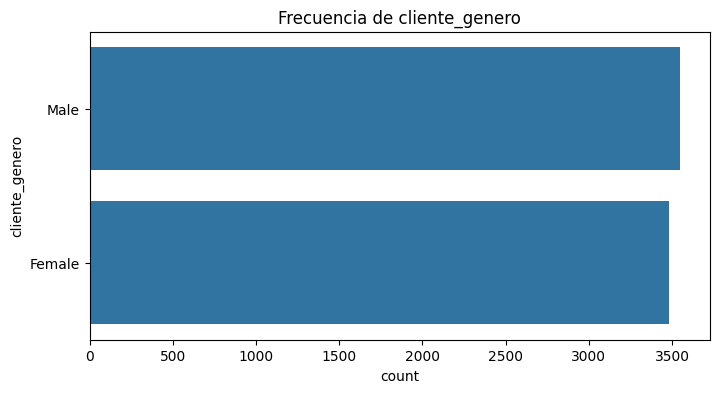


--- telefono_lineas_multiples ---
telefono_lineas_multiples
No                  3385
Yes                 2967
No phone service     680
Name: count, dtype: int64
Valores √∫nicos: ['No', 'Yes', 'No phone service']
Categories (3, object): ['No', 'No phone service', 'Yes']
Valores nulos: 0


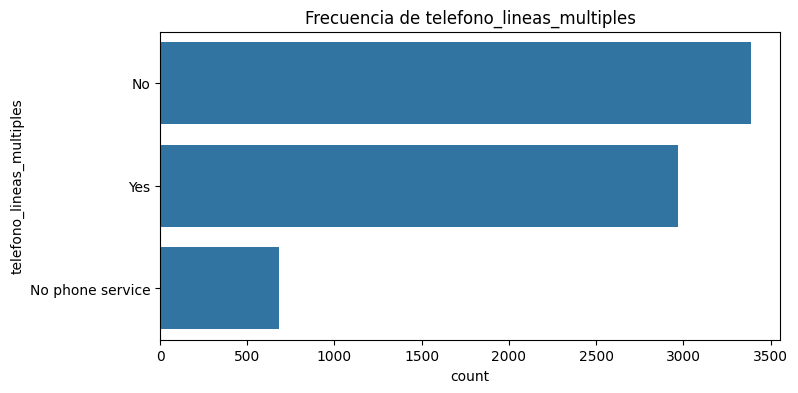


--- internet_servicio ---
internet_servicio
Fiber optic    3096
DSL            2416
No             1520
Name: count, dtype: int64
Valores √∫nicos: ['DSL', 'Fiber optic', 'No']
Categories (3, object): ['DSL', 'Fiber optic', 'No']
Valores nulos: 0


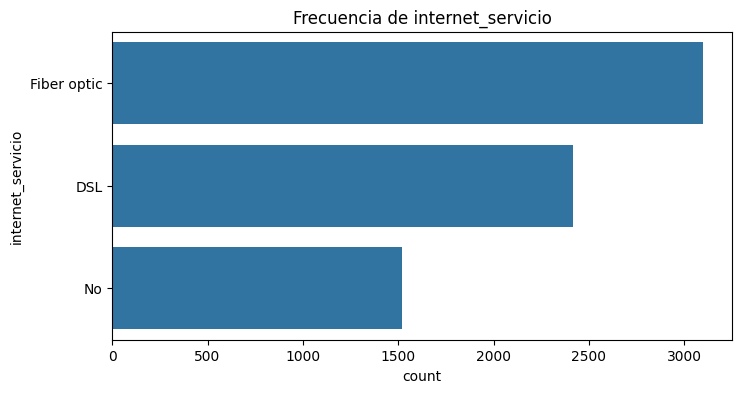


--- internet_seguridad_en_linea ---
internet_seguridad_en_linea
No                     3497
Yes                    2015
No internet service    1520
Name: count, dtype: int64
Valores √∫nicos: ['No', 'Yes', 'No internet service']
Categories (3, object): ['No', 'No internet service', 'Yes']
Valores nulos: 0


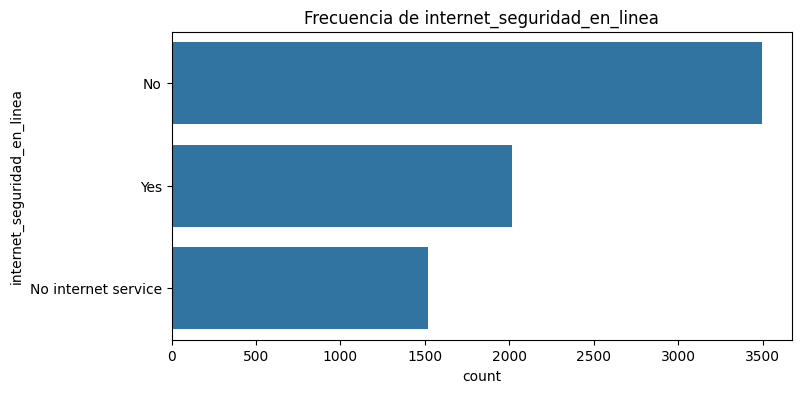


--- internet_respaldo_en_linea ---
internet_respaldo_en_linea
No                     3087
Yes                    2425
No internet service    1520
Name: count, dtype: int64
Valores √∫nicos: ['Yes', 'No', 'No internet service']
Categories (3, object): ['No', 'No internet service', 'Yes']
Valores nulos: 0


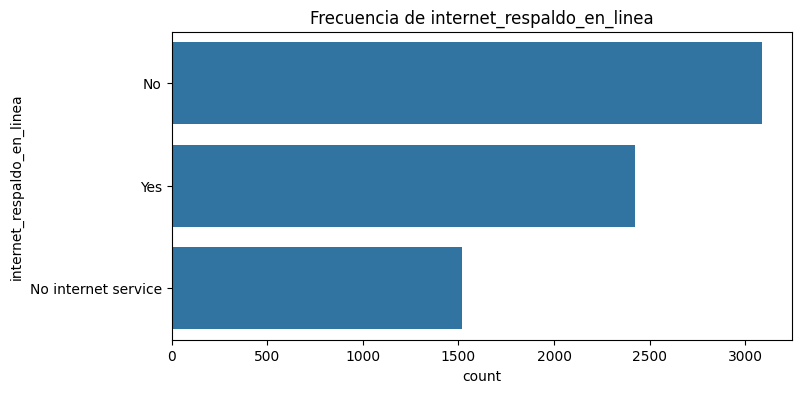


--- internet_proteccion_dispositivo ---
internet_proteccion_dispositivo
No                     3094
Yes                    2418
No internet service    1520
Name: count, dtype: int64
Valores √∫nicos: ['No', 'Yes', 'No internet service']
Categories (3, object): ['No', 'No internet service', 'Yes']
Valores nulos: 0


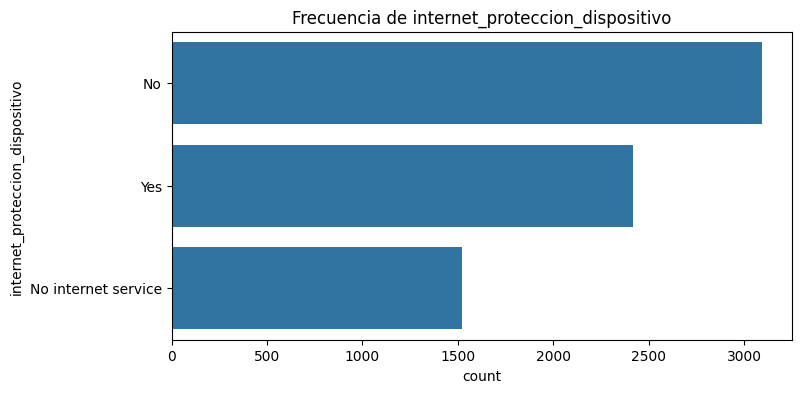


--- internet_soporte_tecnico ---
internet_soporte_tecnico
No                     3472
Yes                    2040
No internet service    1520
Name: count, dtype: int64
Valores √∫nicos: ['Yes', 'No', 'No internet service']
Categories (3, object): ['No', 'No internet service', 'Yes']
Valores nulos: 0


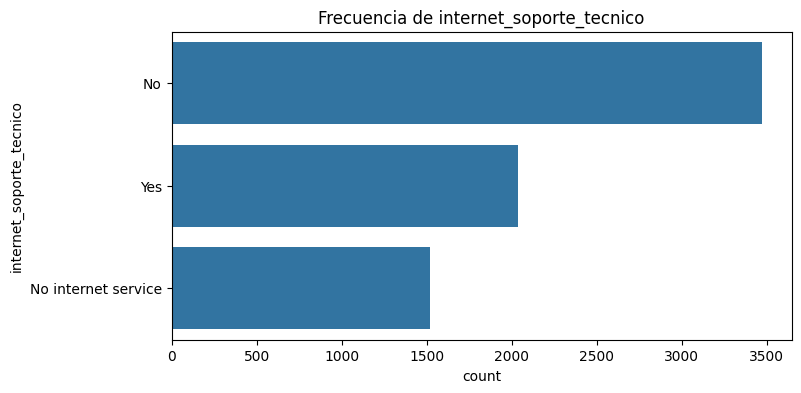


--- internet_streaming_tv ---
internet_streaming_tv
No                     2809
Yes                    2703
No internet service    1520
Name: count, dtype: int64
Valores √∫nicos: ['Yes', 'No', 'No internet service']
Categories (3, object): ['No', 'No internet service', 'Yes']
Valores nulos: 0


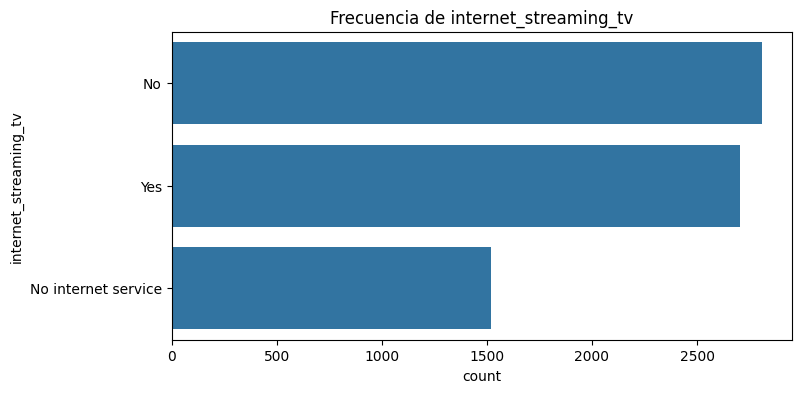


--- internet_streaming_peliculas ---
internet_streaming_peliculas
No                     2781
Yes                    2731
No internet service    1520
Name: count, dtype: int64
Valores √∫nicos: ['No', 'Yes', 'No internet service']
Categories (3, object): ['No', 'No internet service', 'Yes']
Valores nulos: 0


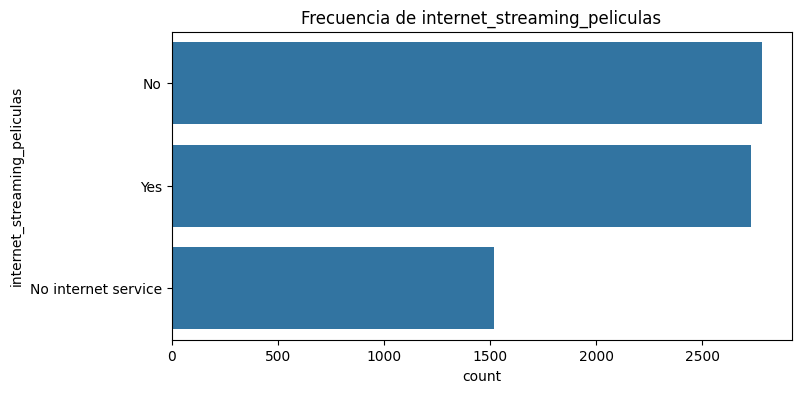


--- cuenta_contrato ---
cuenta_contrato
Month-to-month    3875
Two year          1685
One year          1472
Name: count, dtype: int64
Valores √∫nicos: ['One year', 'Month-to-month', 'Two year']
Categories (3, object): ['Month-to-month', 'One year', 'Two year']
Valores nulos: 0


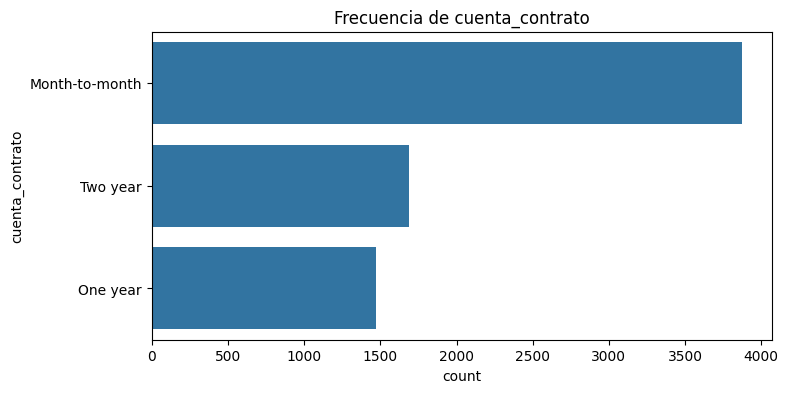


--- cuenta_metodo_pago ---
cuenta_metodo_pago
Electronic check             2365
Mailed check                 1604
Bank transfer (automatic)    1542
Credit card (automatic)      1521
Name: count, dtype: int64
Valores √∫nicos: ['Mailed check', 'Electronic check', 'Credit card (automatic)', 'Bank transfer (automatic)']
Categories (4, object): ['Bank transfer (automatic)', 'Credit card (automatic)', 'Electronic check',
                         'Mailed check']
Valores nulos: 0


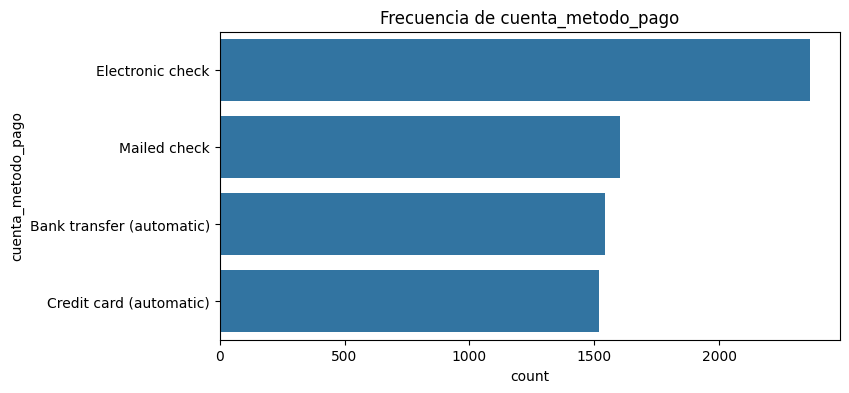

In [72]:
categoricas = clientes.select_dtypes(include=['category']).columns

for col in categoricas:
    print(f"\n--- {col} ---")
    print(clientes[col].value_counts())
    print("Valores √∫nicos:", clientes[col].unique())
    print("Valores nulos:", clientes[col].isnull().sum())

    plt.figure(figsize=(8, 4))
    sns.countplot(y=col, data=clientes, order=clientes[col].value_counts().index)
    plt.title(f'Frecuencia de {col}')
    plt.show()

Observaciones:
- cliente_genero: distribuci√≥n muy equilibrada entre g√©neros, 50.5% hombres y 49.5% mujeres.
- telefono_lineas_multiples: casi la mitad de los clientes tienen m√∫ltiples l√≠neas (42.2%), mientras que un 48.1% no las tiene. Un 9.7% no cuenta con servicio telef√≥nico, lo que indica una fracci√≥n menor sin este tipo de servicio.
- internet_servicio: la mayor√≠a de los clientes tiene acceso a Internet (78.4%), principalmente mediante fibra √≥ptica (44%) o DSL (34.4%), mientras que el 21.6% no posee servicio de Internet.
- internet_seguridad_en_linea: entre quienes tienen Internet, la mayor√≠a no tiene este servicio (aproximadamente 63.4%).
- internet_respaldo_en_linea: de los clientes con Internet, una mayor√≠a no utiliza servicios de respaldo en l√≠nea.
- internet_proteccion_dispositivo: la mayor√≠a de los clientes con acceso a Internet no cuentan con protecci√≥n de dispositivos.
- internet_soporte_tecnico: la proporci√≥n de clientes sin soporte t√©cnico es mayoritaria entre quienes tienen servicio de Internet.
internet_streaming_tv: entre los clientes con Internet, el uso del servicio de streaming de TV est√° casi equilibrado, una ligera mayor√≠a no lo utiliza, pero hay una proporci√≥n considerable que s√≠ lo hace.
- internet_streaming_peliculas: esta variable refleja una distribuci√≥n muy similar a la de streaming de TV, con casi la mitad de los clientes con Internet accediendo a este servicio.
- cuenta_contrato: la mayor√≠a de los contratos son mensuales (55.1%), lo que puede indicar baja fidelizaci√≥n. Contratos de uno y dos a√±os suman el 44.9%, mostrando una base relevante de clientes m√°s comprometidos.
- cuenta_metodo_pago: el m√©todo m√°s com√∫n es el cheque electr√≥nico (33.6%), seguido del cheque por correo (22.8%). Los m√©todos autom√°ticos (transferencia bancaria y tarjeta de cr√©dito) representan aproximadamente el 43.6%, lo cual sugiere una divisi√≥n en las preferencias entre pagos manuales y autom√°ticos.

###**3.1.2- Variables binarias (incluyendo cancelado o evasi√≥n)**


--- cancelado ---
cancelado
False    5163
True     1869
Name: count, dtype: int64


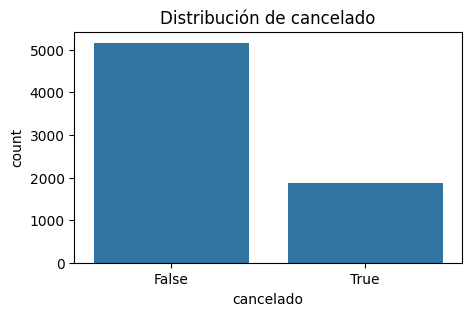


--- cliente_mayor ---
cliente_mayor
False    5890
True     1142
Name: count, dtype: int64


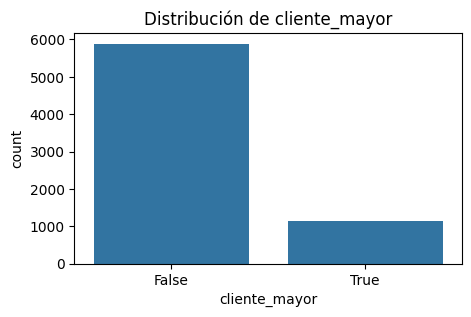


--- cliente_con_pareja ---
cliente_con_pareja
False    3639
True     3393
Name: count, dtype: int64


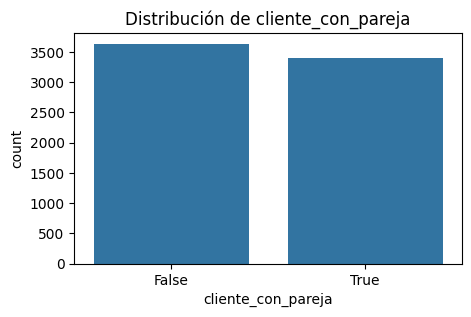


--- cliente_con_dependientes ---
cliente_con_dependientes
False    4933
True     2099
Name: count, dtype: int64


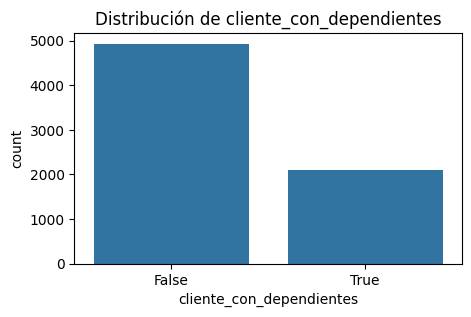


--- telefono_servicio ---
telefono_servicio
True     6352
False     680
Name: count, dtype: int64


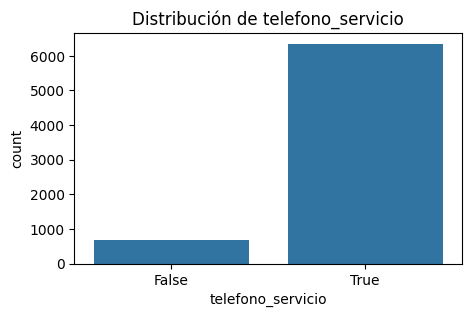


--- cuenta_facturacion_digital ---
cuenta_facturacion_digital
True     4168
False    2864
Name: count, dtype: int64


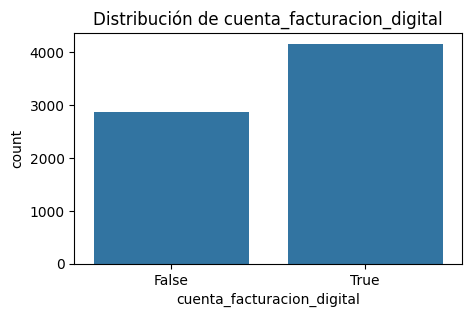

In [73]:
booleanas = clientes.select_dtypes(include='bool').columns

for col in booleanas:
    print(f"\n--- {col} ---")
    print(clientes[col].value_counts(dropna=False))

    plt.figure(figsize=(5, 3))
    sns.countplot(x=col, data=clientes)
    plt.title(f'Distribuci√≥n de {col}')
    plt.show()

Observaciones:

- cancelado: aproximadamente una cuarta parte de los clientes (26.5%) han cancelado el servicio. Este dato puede ser clave como variable objetivo en un an√°lisis de abandono o churn.
- cliente_mayor (65 a√±os o m√°s): la mayor√≠a de los clientes son menores de 65 a√±os (83.7%). Esto puede influir en el tipo de servicios contratados o en la retenci√≥n.
- cliente_con_pareja: casi est√° perfectamente balanceada.
- cliente_con_dependientes: una gran mayor√≠a de los clientes no tiene dependientes (70.2%).
- telefono_servicio: a mayor√≠a de los clientes cuenta con servicio telef√≥nico (90.3%).
- cuenta_facturacion_digital: m√°s de la mitad de los clientes utilizan facturaci√≥n digital (59.3%).

##**3.2- An√°lisis bivariado**

###**3.2.1- Variables num√©ricas**


--- cliente_antiguedad ---


count   mean    std  min   25%   50%   75%   max
cancelado                                                   
False      5163.0  37.65  24.08  1.0  15.0  38.0  61.0  72.0
True       1869.0  17.98  19.53  1.0   2.0  10.0  29.0  72.0

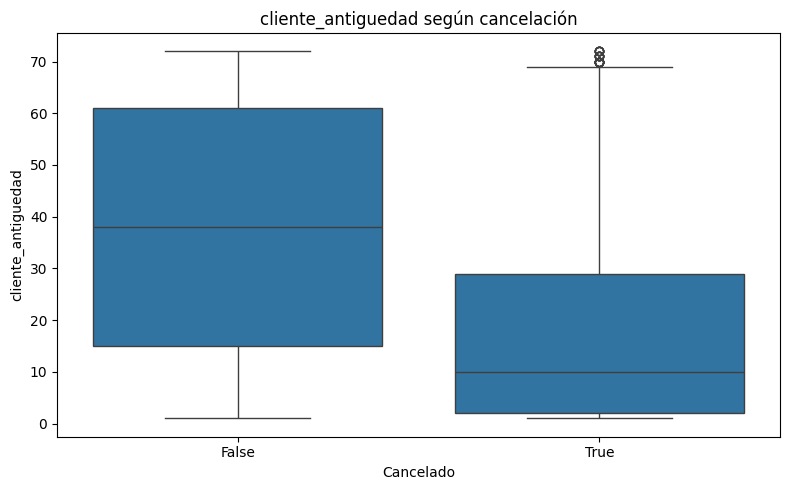


--- cuenta_cargos_mensuales ---


count   mean    std    min    25%    50%    75%     max
cancelado                                                          
False      5163.0  61.31  31.09  18.25  25.10  64.45  88.48  118.75
True       1869.0  74.44  24.67  18.85  56.15  79.65  94.20  118.35

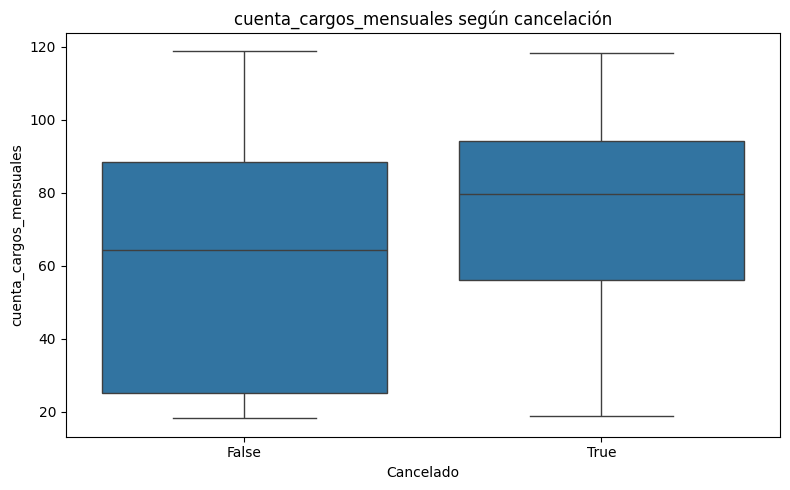


--- cuenta_cargos_totales ---


count     mean      std    min     25%      50%      75%      max
cancelado                                                                    
False      5163.0  2555.34  2329.46  18.80  577.83  1683.60  4264.12  8672.45
True       1869.0  1531.80  1890.82  18.85  134.50   703.55  2331.30  8684.80

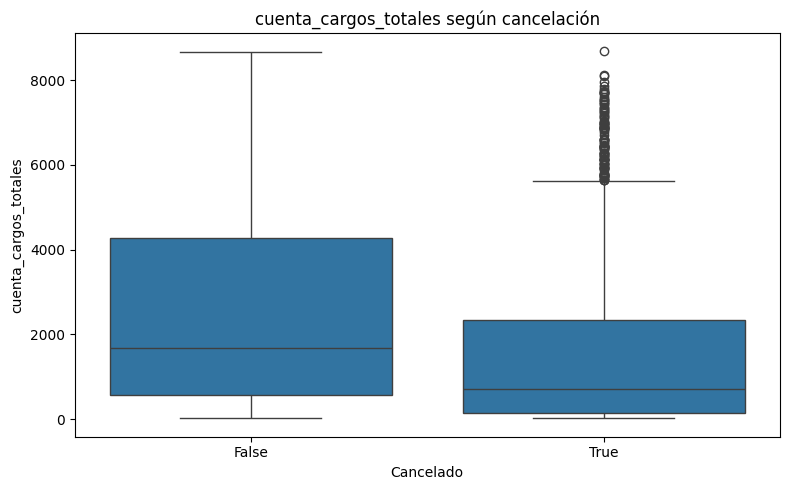


--- Cuentas_Diarias ---


count  mean   std   min   25%   50%   75%   max
cancelado                                                  
False      5163.0  2.01  1.02  0.60  0.82  2.12  2.91  3.90
True       1869.0  2.45  0.81  0.62  1.84  2.62  3.09  3.89

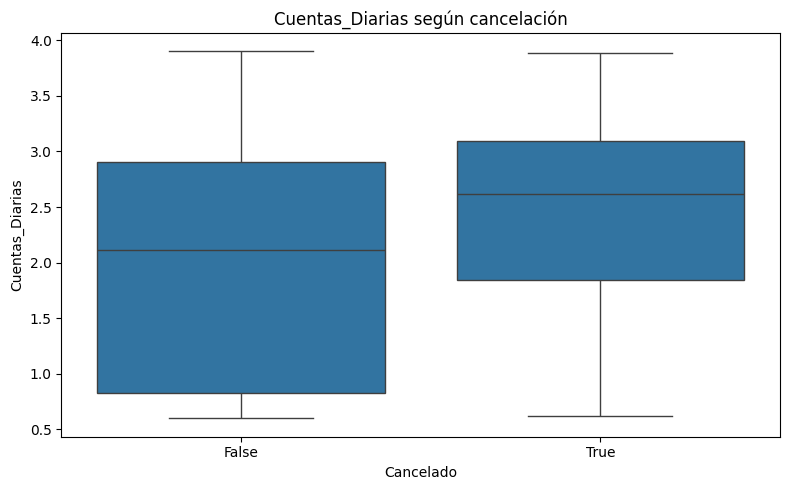

In [74]:
variables_numericas = ['cliente_antiguedad', 'cuenta_cargos_mensuales', 'cuenta_cargos_totales', 'Cuentas_Diarias']

for var in variables_numericas:
    print(f"\n--- {var} ---")

    # Tabla resumen por grupo de cancelaci√≥n
    resumen = clientes.groupby('cancelado')[var].describe().round(2)
    display(resumen)

    # Gr√°fico: solo boxplot
    plt.figure(figsize=(8, 5))
    sns.boxplot(x='cancelado', y=var, data=clientes)
    plt.title(f'{var} seg√∫n cancelaci√≥n')
    plt.xlabel('Cancelado')
    plt.ylabel(var)
    plt.tight_layout()
    plt.show()

Observaciones:

- cliente_antiguedad (meses como cliente): los clientes que no cancelaron tienen una media de 37.65 meses como clientes, mientras que los que cancelaro 17.98 meses, mostrando que quienes cancelan tienden a ser clientes m√°s recientes. Los percentiles tambi√©n refuerzan esto: el 75% de los clientes que cancelaron tienen menos de 29 meses de antig√ºedad, frente a 61 meses en los que no cancelaron. La diferencia en la distribuci√≥n general es clara: los clientes que permanecen m√°s tiempo tienen menor propensi√≥n a cancelar.
- cuenta_cargos_mensuales (cargo mensual promedio): los clientes que cancelaron tienen una media m√°s alta (74.44) que los que no cancelaron (61.31). La mediana tambi√©n refleja esta diferencia (79.65 vs. 64.45), lo cual indica que quienes pagan m√°s mensualmente tienen mayor tasa de cancelaci√≥n.
- cuenta_cargos_totales (total acumulado de cargos): los clientes que no cancelaron tienen un total promedio mucho mayor (2555.34) que los cancelados (1531.80). Esto es l√≥gico: los clientes con mayor antig√ºedad han acumulado m√°s cargos, mientras que quienes cancelan tienden a tener una historia de uso m√°s corta. Este patr√≥n refleja que los clientes m√°s antiguos no solo permanecen m√°s, sino que tambi√©n han aportado m√°s ingresos.
- Cuentas_Diarias (uso promedio diario del servicio): los clientes que cancelaron tienen un mayor promedio diario (2.45) que los que no cancelaron (2.01). Esto sugiere que, en promedio, los clientes que cancelan usan m√°s el servicio por d√≠a mientras est√°n activos.

Resumen general:
- Los clientes que cancelan tienden a:
  - Tener menos antig√ºedad.
  - Pagar m√°s por mes.
  - Haber gastado menos en total (l√≥gico, por menor permanencia).
  - Tener un uso diario ligeramente m√°s alto.

###**3.2.2- Variables categ√≥ricas (incluyendo booleanas)**


--- cliente_genero ---


cancelado       False  True 
cliente_genero              
Female           2544    939
Male             2619    930


Distribuci√≥n porcentual (% dentro de cada categor√≠a):


cancelado       False  True 
cliente_genero              
Female          73.04  26.96
Male            73.80  26.20

<Figure size 600x400 with 0 Axes>

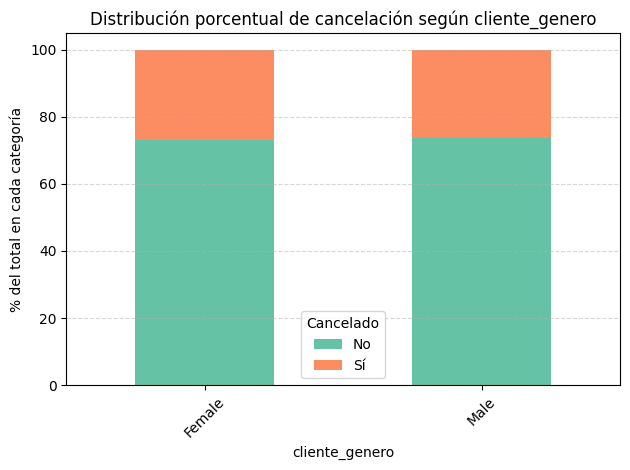


--- telefono_lineas_multiples ---


cancelado                  False  True 
telefono_lineas_multiples              
No                          2536    849
No phone service             510    170
Yes                         2117    850


Distribuci√≥n porcentual (% dentro de cada categor√≠a):


cancelado                  False  True 
telefono_lineas_multiples              
No                         74.92  25.08
No phone service           75.00  25.00
Yes                        71.35  28.65

<Figure size 600x400 with 0 Axes>

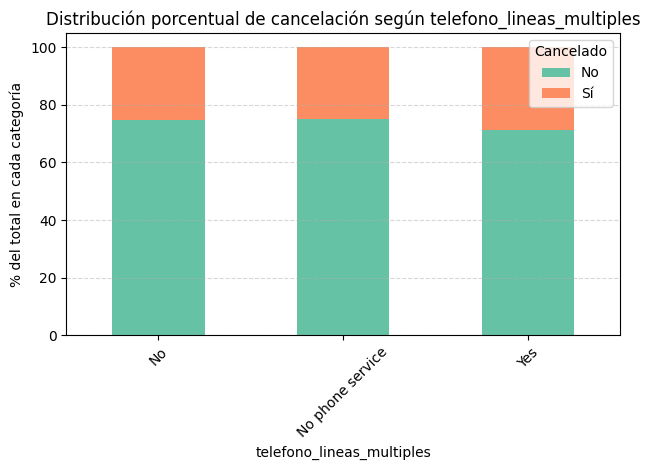


--- internet_servicio ---


cancelado          False  True 
internet_servicio              
DSL                 1957    459
Fiber optic         1799   1297
No                  1407    113


Distribuci√≥n porcentual (% dentro de cada categor√≠a):


cancelado          False  True 
internet_servicio              
DSL                81.00  19.00
Fiber optic        58.11  41.89
No                 92.57   7.43

<Figure size 600x400 with 0 Axes>

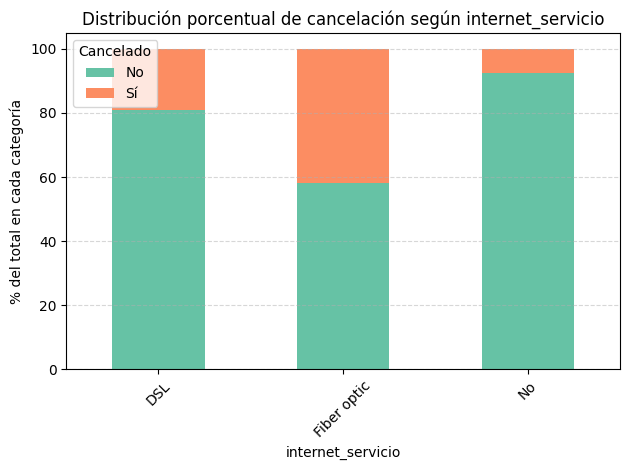


--- internet_seguridad_en_linea ---


cancelado                    False  True 
internet_seguridad_en_linea              
No                            2036   1461
No internet service           1407    113
Yes                           1720    295


Distribuci√≥n porcentual (% dentro de cada categor√≠a):


cancelado                    False  True 
internet_seguridad_en_linea              
No                           58.22  41.78
No internet service          92.57   7.43
Yes                          85.36  14.64

<Figure size 600x400 with 0 Axes>

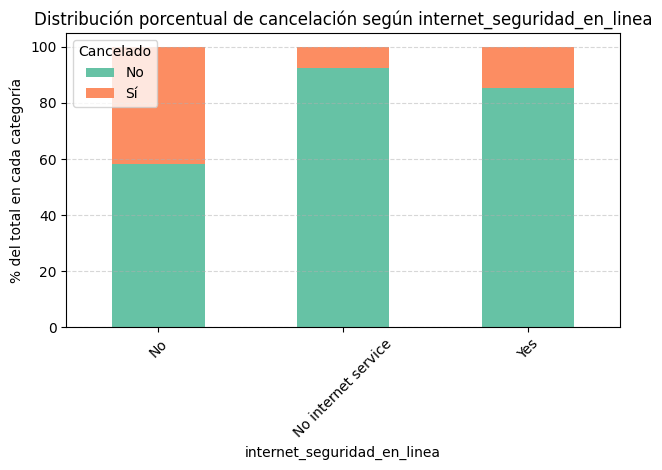


--- internet_respaldo_en_linea ---


cancelado                   False  True 
internet_respaldo_en_linea              
No                           1854   1233
No internet service          1407    113
Yes                          1902    523


Distribuci√≥n porcentual (% dentro de cada categor√≠a):


cancelado                   False  True 
internet_respaldo_en_linea              
No                          60.06  39.94
No internet service         92.57   7.43
Yes                         78.43  21.57

<Figure size 600x400 with 0 Axes>

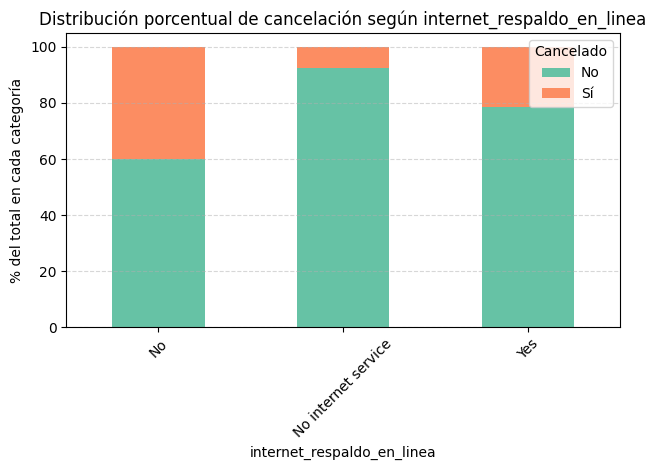


--- internet_proteccion_dispositivo ---


cancelado                        False  True 
internet_proteccion_dispositivo              
No                                1883   1211
No internet service               1407    113
Yes                               1873    545


Distribuci√≥n porcentual (% dentro de cada categor√≠a):


cancelado                        False  True 
internet_proteccion_dispositivo              
No                               60.86  39.14
No internet service              92.57   7.43
Yes                              77.46  22.54

<Figure size 600x400 with 0 Axes>

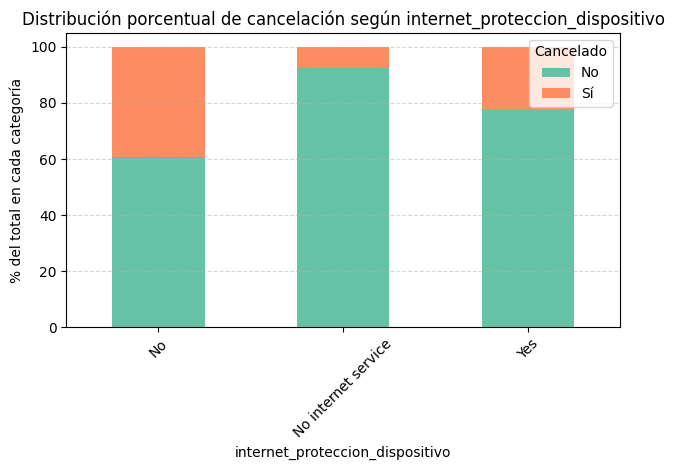


--- internet_soporte_tecnico ---


cancelado                 False  True 
internet_soporte_tecnico              
No                         2026   1446
No internet service        1407    113
Yes                        1730    310


Distribuci√≥n porcentual (% dentro de cada categor√≠a):


cancelado                 False  True 
internet_soporte_tecnico              
No                        58.35  41.65
No internet service       92.57   7.43
Yes                       84.80  15.20

<Figure size 600x400 with 0 Axes>

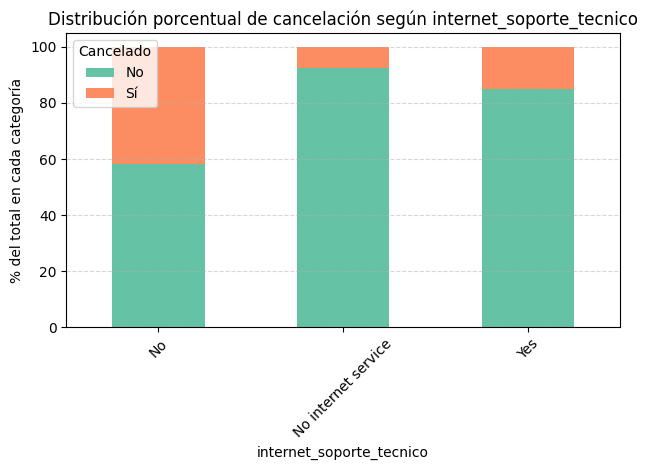


--- internet_streaming_tv ---


cancelado              False  True 
internet_streaming_tv              
No                      1867    942
No internet service     1407    113
Yes                     1889    814


Distribuci√≥n porcentual (% dentro de cada categor√≠a):


cancelado              False  True 
internet_streaming_tv              
No                     66.46  33.54
No internet service    92.57   7.43
Yes                    69.89  30.11

<Figure size 600x400 with 0 Axes>

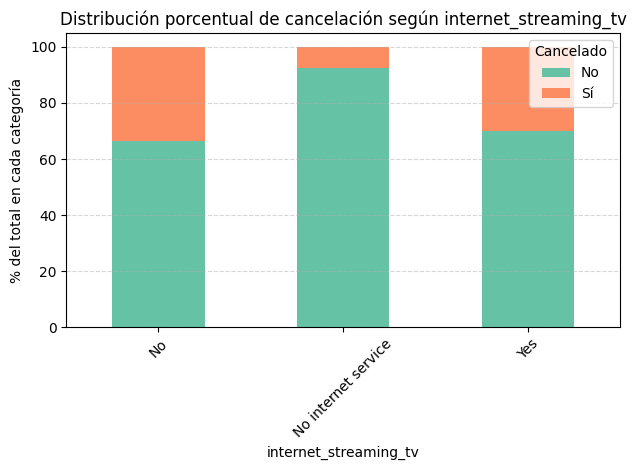


--- internet_streaming_peliculas ---


cancelado                     False  True 
internet_streaming_peliculas              
No                             1843    938
No internet service            1407    113
Yes                            1913    818


Distribuci√≥n porcentual (% dentro de cada categor√≠a):


cancelado                     False  True 
internet_streaming_peliculas              
No                            66.27  33.73
No internet service           92.57   7.43
Yes                           70.05  29.95

<Figure size 600x400 with 0 Axes>

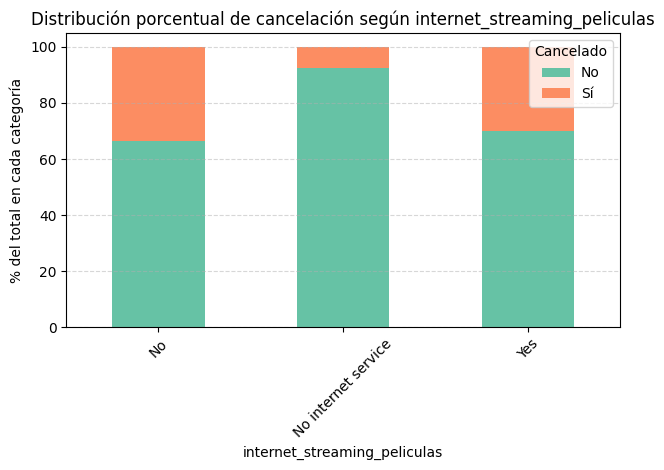


--- cuenta_contrato ---


cancelado        False  True 
cuenta_contrato              
Month-to-month    2220   1655
One year          1306    166
Two year          1637     48


Distribuci√≥n porcentual (% dentro de cada categor√≠a):


cancelado        False  True 
cuenta_contrato              
Month-to-month   57.29  42.71
One year         88.72  11.28
Two year         97.15   2.85

<Figure size 600x400 with 0 Axes>

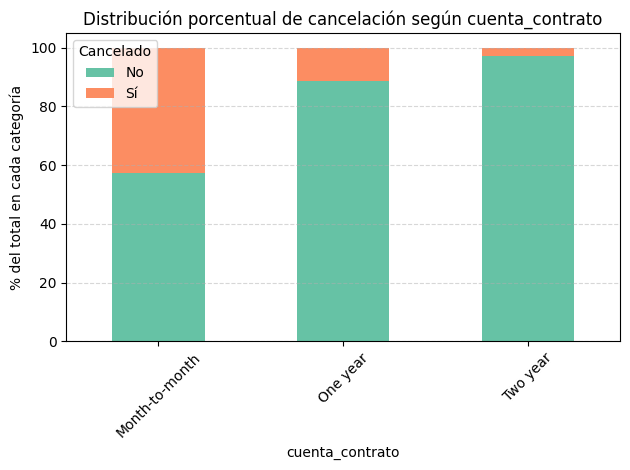


--- cuenta_metodo_pago ---


cancelado                  False  True 
cuenta_metodo_pago                     
Bank transfer (automatic)   1284    258
Credit card (automatic)     1289    232
Electronic check            1294   1071
Mailed check                1296    308


Distribuci√≥n porcentual (% dentro de cada categor√≠a):


cancelado                  False  True 
cuenta_metodo_pago                     
Bank transfer (automatic)  83.27  16.73
Credit card (automatic)    84.75  15.25
Electronic check           54.71  45.29
Mailed check               80.80  19.20

<Figure size 600x400 with 0 Axes>

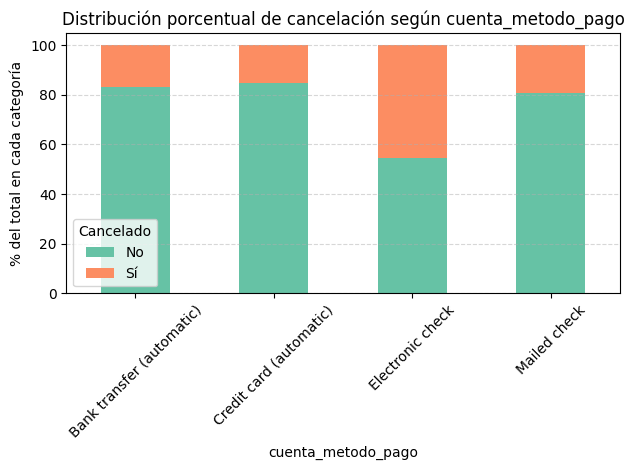


--- cliente_mayor ---


cancelado      False  True 
cliente_mayor              
False           4497   1393
True             666    476


Distribuci√≥n porcentual (% dentro de cada categor√≠a):


cancelado      False  True 
cliente_mayor              
False          76.35  23.65
True           58.32  41.68

<Figure size 600x400 with 0 Axes>

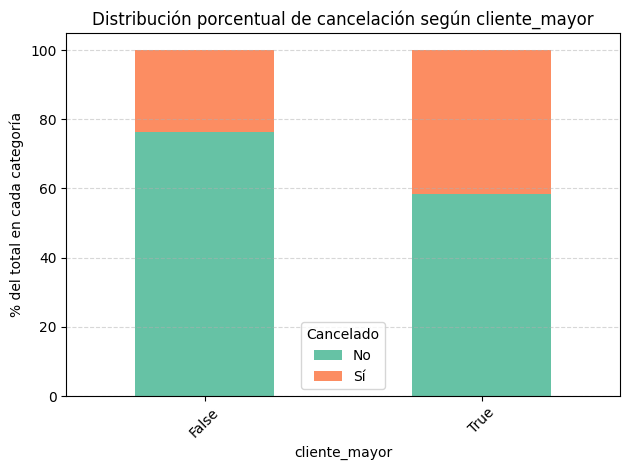


--- cliente_con_pareja ---


cancelado           False  True 
cliente_con_pareja              
False                2439   1200
True                 2724    669


Distribuci√≥n porcentual (% dentro de cada categor√≠a):


cancelado           False  True 
cliente_con_pareja              
False               67.02  32.98
True                80.28  19.72

<Figure size 600x400 with 0 Axes>

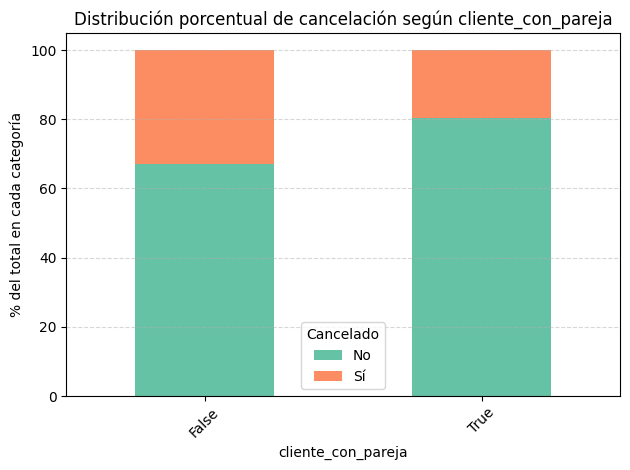


--- cliente_con_dependientes ---


cancelado                 False  True 
cliente_con_dependientes              
False                      3390   1543
True                       1773    326


Distribuci√≥n porcentual (% dentro de cada categor√≠a):


cancelado                 False  True 
cliente_con_dependientes              
False                     68.72  31.28
True                      84.47  15.53

<Figure size 600x400 with 0 Axes>

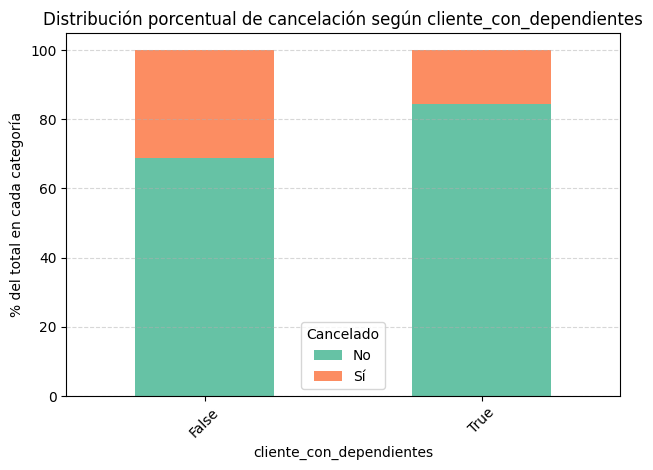


--- telefono_servicio ---


cancelado          False  True 
telefono_servicio              
False                510    170
True                4653   1699


Distribuci√≥n porcentual (% dentro de cada categor√≠a):


cancelado          False  True 
telefono_servicio              
False              75.00  25.00
True               73.25  26.75

<Figure size 600x400 with 0 Axes>

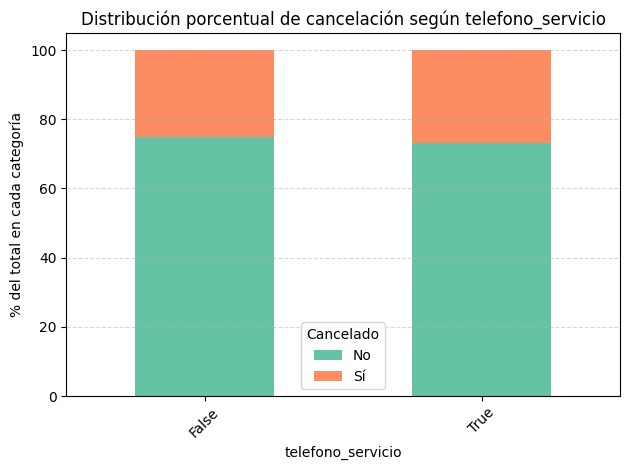


--- cuenta_facturacion_digital ---


cancelado                   False  True 
cuenta_facturacion_digital              
False                        2395    469
True                         2768   1400


Distribuci√≥n porcentual (% dentro de cada categor√≠a):


cancelado                   False  True 
cuenta_facturacion_digital              
False                       83.62  16.38
True                        66.41  33.59

<Figure size 600x400 with 0 Axes>

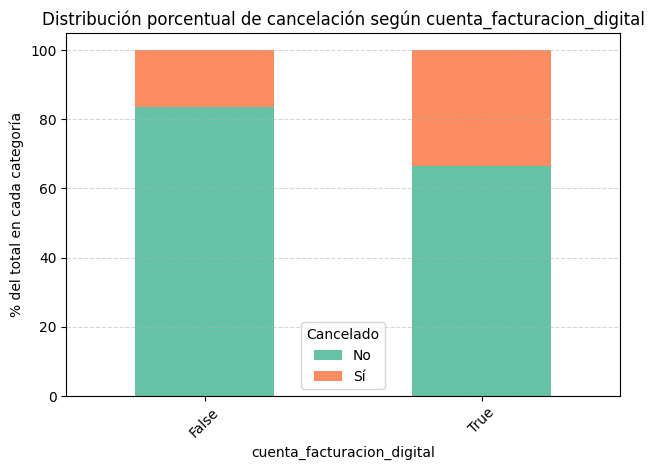

In [75]:
variables_categoricas = [
    'cliente_genero', 'telefono_lineas_multiples', 'internet_servicio',
    'internet_seguridad_en_linea', 'internet_respaldo_en_linea',
    'internet_proteccion_dispositivo', 'internet_soporte_tecnico',
    'internet_streaming_tv', 'internet_streaming_peliculas',
    'cuenta_contrato', 'cuenta_metodo_pago',
    'cliente_mayor', 'cliente_con_pareja', 'cliente_con_dependientes',
    'telefono_servicio', 'cuenta_facturacion_digital'
]

for var in variables_categoricas:
    print(f"\n--- {var} ---")

    # Tabla cruzada
    tabla = pd.crosstab(clientes[var], clientes["cancelado"])
    tabla_prop = pd.crosstab(clientes[var], clientes["cancelado"], normalize='index') * 100

    display(tabla)
    print("\nDistribuci√≥n porcentual (% dentro de cada categor√≠a):")
    display(tabla_prop.round(2))

    # Gr√°fico de barras apiladas proporcionales
    plt.figure(figsize=(6, 4))
    tabla_prop.plot(kind='bar', stacked=True, color=['#66c2a5', '#fc8d62'])
    plt.title(f'Distribuci√≥n porcentual de cancelaci√≥n seg√∫n {var}')
    plt.ylabel('% del total en cada categor√≠a')
    plt.xlabel(var)
    plt.legend(title='Cancelado', labels=['No', 'S√≠'])
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.grid(axis='y', linestyle='--', alpha=0.5)
    plt.show()

Observaciones:

- cliente_genero (g√©nero del cliente): la proporci√≥n de cancelaci√≥n es pr√°cticamente igual entre g√©neros, por lo que el g√©nero del cliente no parece ser un factor determinante en la cancelaci√≥n del servicio:
  - Mujeres: 26.96%
  - Hombres: 26.20%
- telefono_lineas_multiples (l√≠neas m√∫ltiples contratadas): Los clientes con l√≠neas m√∫ltiples tienen una tasa de cancelaci√≥n del 28.65%, ligeramente m√°s alta que los que no tienen (25.08%). Los que no tienen servicio telef√≥nico tienen una tasa intermedia (25.00%).

  Esto sugiere que tener varias l√≠neas podr√≠a estar relacionado con mayor tasa de cancelaci√≥n, aunque las diferencias son sutiles.
- internet_servicio (tipo de servicio de internet):
  - Fibra √≥ptica: 41.89%.
  - DSL: 19.00%.
  - Sin servicio de internet: 7.43%.

  El servicio de fibra √≥ptica tiene la tasa de cancelaci√≥n m√°s alta con diferencia.
- internet_seguridad_en_linea (servicio de seguridad en l√≠nea):
  - Sin seguridad en l√≠nea: 41.78% cancelaron
  - Con seguridad en l√≠nea: 14.64%
  - Sin internet: 7.43%

  No contar con servicios adicionales como seguridad en l√≠nea parece asociado a mayor probabilidad de cancelaci√≥n.
- internet_respaldo_en_linea (respaldo en la nube):
  - Sin respaldo: 39.94%
  - Con respaldo: 21.57%
  - Sin internet: 7.43%

  El respaldo en l√≠nea tambi√©n muestra menor tasa de cancelaci√≥n, apoyando la idea de que los servicios adicionales mejoran la retenci√≥n
- internet_proteccion_dispositivo (protecci√≥n de dispositivos):
  - Sin protecci√≥n: 39.14% cancelaron
  - Con protecci√≥n: 22.54%
  - Sin internet: 7.43%

  Una vez m√°s, contar con servicios extra reduce la probabilidad de cancelaci√≥n.
- internet_soporte_tecnico (soporte t√©cnico contratado):
  - Sin soporte: 41.65% cancelaron
  - Con soporte: 15.20%
  - Sin internet: 7.43%

  La diferencia es notable. El soporte t√©cnico parece estar fuertemente vinculado a la retenci√≥n del cliente.
- internet_streaming_tv (servicio de TV por streaming):
  - Sin servicio: 33.54% cancelaron
  - Con servicio: 30.11%
  - Sin internet: 7.43%

  Tener este servicio adicional tambi√©n parece reducir ligeramente la tasa de cancelaci√≥n.
- internet_streaming_peliculas (streaming de pel√≠culas)
  - Sin servicio: 33.73%
  - Con servicio: 29.95%
  - Sin internet: 7.43%

  Los clientes con este tipo de contenido tienden a cancelar un poco menos, similar al patr√≥n anterior.
- cuenta_contrato (tipo de contrato):
  - Mes a mes: 42.71% cancelaron
  - 1 a√±o: 11.28%
  - 2 a√±os: 2.85%

  Este es uno de los factores m√°s claramente asociados a la cancelaci√≥n:
  contratos a largo plazo tienen menor tasa de cancelaci√≥n.
- cuenta_metodo_pago (m√©todo de pago):
  - Electronic check: 45.29% cancelaron
  - Bank transfer / Credit card (autom√°ticos): 16‚Äì17%
   -Cheque por correo: 19.20%

  Los pagos autom√°ticos est√°n fuertemente asociados con baja cancelaci√≥n, mientras que quienes pagan con cheque electr√≥nico cancelan mucho m√°s.
- cliente_mayor (edad mayor):
  - Mayores: 41.68% cancelaron
  - No mayores: 23.65%

  Los clientes mayores tienen una tasa de cancelaci√≥n m√°s alta.
- cliente_con_pareja:
  - Con pareja: 19.72% cancelaron
  - Sin pareja: 32.98%

  Tener pareja parece reducir la probabilidad de cancelar.
- cliente_con_dependientes:
  - Con dependientes: 15.53% cancelaron
  - Sin dependientes: 31.28%

  Tener personas a cargo se asocia con menor cancelaci√≥n.
- telefono_servicio:
  - Con servicio: 26.75%
  - Sin servicio: 25.00%

  Diferencia poco significativa. El servicio telef√≥nico no parece tener una relaci√≥n clara con la cancelaci√≥n.
- cuenta_facturacion_digital:
  - Con facturaci√≥n digital: 33.59%
  - Sin facturaci√≥n digital: 16.38%

  Los usuarios con facturaci√≥n digital tienen una tasa de cancelaci√≥n mucho mayor.

Resumen general:
  - Los clientes con servicios adicionales (seguridad, respaldo, soporte, streaming) y contratos largos o pagos autom√°ticos son menos propensos a cancelar.
  - Los clientes con fibra √≥ptica, sin servicios extra, sin pareja o con pagos electr√≥nicos presentan tasas de cancelaci√≥n m√°s altas.

#üìÑ**4- Informe final**

##**4.1- Introducci√≥n**
El presente informe tiene como objetivo analizar el comportamiento de los clientes de TelecomX LATAM con relaci√≥n a la evasi√≥n del servicio (churn). A partir de un conjunto de datos hist√≥ricos de clientes, se busca identificar patrones y caracter√≠sticas que distingan a los usuarios que cancelan el servicio de aquellos que lo mantienen. Comprender estos factores permitir√° tomar decisiones estrat√©gicas orientadas a reducir la tasa de cancelaci√≥n y mejorar la retenci√≥n.

##**4.2- Limpieza y Tratamiento de Datos**
Se realiz√≥ una limpieza y tratamiento inicial de los datos que incluy√≥:
- Conversi√≥n de variables categ√≥ricas y booleanas para facilitar el an√°lisis.
- Revisi√≥n de valores nulos o inconsistentes.
- Transformaci√≥n de columnas para un mejor manejo anal√≠tico, como la creaci√≥n de la variable Cuentas_Diarias a partir del total gastado y la antig√ºedad del cliente.
- Normalizaci√≥n y renombramiento de columnas para mejorar la legibilidad del an√°lisis.

Estas acciones aseguraron que los datos est√©n listos para su an√°lisis exploratorio y visualizaci√≥n.

##**4.3- An√°lisis Exploratorio**

###**4.3.1- An√°lisis Univariado**
Se analizaron variables como:
- cancelado: aproximadamente el 26.6% de los clientes cancelaron el servicio.
- cliente_mayor: s√≥lo el 16.2% de los clientes son adultos mayores.
- cliente_con_pareja y cliente_con_dependientes: distribuidos de manera m√°s balanceada, lo que indica diversidad de perfiles familiares.
- telefono_servicio y cuenta_facturacion_digital: m√°s del 90% tiene tel√©fono y alrededor del 59% usa facturaci√≥n digital.

Estas variables ayudan a perfilar al cliente promedio, pero por s√≠ solas no explican el churn.

###**4.3.2- An√°lisis Bivariado**
Se compararon distintas variables num√©ricas entre clientes que cancelaron y los que no:
- cliente_antiguedad (meses como cliente):
  -Cancelados: media de 17.98 meses.
  -No cancelados: media de 37.65 meses.

Los clientes m√°s antiguos tienden a permanecer, mientras que los nuevos cancelan con mayor frecuencia.

- cuenta_cargos_mensuales:
  - Cancelados: media de 74.44.
  - No cancelados: media de 61.31.

  Clientes con cargos mensuales m√°s altos presentan mayor tasa de cancelaci√≥n.
- cuenta_cargos_totales:
  - Cancelados: 1531.80 en promedio.
  - No cancelados: 2555.34 en promedio.

  Los clientes cancelados han gastado menos hist√≥ricamente, probablemente por su menor permanencia.
- Cuentas_Diarias:
  - Cancelados: media de 2.45.
  - No cancelados: media de 2.01.

  Ligeramente mayor uso diario entre quienes cancelan, lo que puede sugerir usuarios intensivos insatisfechos.

Tambi√©n se explor√≥ la relaci√≥n entre cancelado y variables categ√≥ricas y booleanas como:
- tipo_contrato: los clientes con contrato mensual cancelan significativamente m√°s que aquellos con contratos anuales o de m√°s largo plazo.
- metodo_pago: el m√©todo de pago electr√≥nico o autom√°tico tiene una menor tasa de evasi√≥n, en comparaci√≥n con pagos manuales.
- servicios (como internet, seguridad en l√≠nea, respaldo en la nube): la presencia o ausencia de ciertos servicios se asocia con diferentes tasas de cancelaci√≥n, lo que puede reflejar el valor percibido.

**Conclusiones e insights del an√°lisis:**
- Antig√ºedad es un factor cr√≠tico: los clientes nuevos cancelan con m√°s frecuencia. La retenci√≥n temprana es clave.
- Costo mensual influye: a mayor cargo mensual, mayor probabilidad de cancelaci√≥n.
- Usuarios intensivos cancelan m√°s: clientes que usan m√°s el servicio diariamente podr√≠an estar insatisfechos o con expectativas no cubiertas.
- Tipo de contrato es determinante: los contratos mensuales concentran la mayor parte de las cancelaciones.
- El m√©todo de pago importa: los pagos autom√°ticos o digitales est√°n asociados a menor evasi√≥n.

##**4.4- Recomendaciones**
A partir de los resultados del an√°lisis, se sugieren las siguientes acciones estrat√©gicas:
- Programas de retenci√≥n temprana: ofrecer beneficios o seguimiento especial durante los primeros meses del cliente.
- Revisi√≥n de estructura de precios: evaluar si los planes con altos cargos mensuales est√°n alineados con el valor percibido.
- An√°lisis de satisfacci√≥n en usuarios intensivos: indagar si su mayor uso implica necesidades no satisfechas o frustraci√≥n.
- Fomentar contratos a largo plazo: ofrecer incentivos para migrar de contratos mensuales a anuales.
- Promover el uso de pagos autom√°ticos: facilitar y bonificar a quienes opten por m√©todos de pago digitales.

#**5- Extra: An√°lisis de Correlaci√≥n**

In [84]:
clientes

id_cliente  cancelado cliente_genero  cliente_mayor  cliente_con_pareja  \
0     0002-ORFBO      False         Female          False                True   
1     0003-MKNFE      False           Male          False               False   
2     0004-TLHLJ       True           Male          False               False   
3     0011-IGKFF       True           Male           True                True   
4     0013-EXCHZ       True         Female           True                True   
...          ...        ...            ...            ...                 ...   
7262  9987-LUTYD      False         Female          False               False   
7263  9992-RRAMN       True           Male          False                True   
7264  9992-UJOEL      False           Male          False               False   
7265  9993-LHIEB      False           Male          False                True   
7266  9995-HOTOH      False           Male          False                True   

      cliente_con_dependientes  cliente_antiguedad  telefono_servicio  \
0                         True                   9               True   
1                        False                   9               True   
2                        False                   4               True   
3                        False                  13               True   
4                        False                   3               True   
...                        ...                 ...                ...   
7262                     False                  13               True   
7263                     False                  22               True   
7264                     False                   2               True   
7265                      True                  67               True   
7266                      True                  63              False   

     telefono_lineas_multiples internet_servicio  ...  \
0                           No               DSL  ...   
1                          Yes               DSL  ...   
2                           No       Fiber optic  ...   
3                           No       Fiber optic  ...   
4                           No       Fiber optic  ...   
...                        ...               ...  ...   
7262                        No               DSL  ...   
7263                       Yes       Fiber optic  ...   
7264                        No               DSL  ...   
7265                        No               DSL  ...   
7266          No phone service               DSL  ...   

     internet_proteccion_dispositivo internet_soporte_tecnico  \
0                                 No                      Yes   
1                                 No                       No   
2                                Yes                       No   
3                                Yes                       No   
4                                 No                      Yes   
...                              ...                      ...   
7262                              No                      Yes   
7263                              No                       No   
7264                              No                       No   
7265                             Yes                      Yes   
7266                             Yes                       No   

     internet_streaming_tv internet_streaming_peliculas cuenta_contrato  \
0                      Yes                           No        One year   
1                       No                          Yes  Month-to-month   
2                       No                           No  Month-to-month   
3                      Yes                          Yes  Month-to-month   
4                      Yes                           No  Month-to-month   
...                    ...                          ...             ...   
7262                    No                           No        One year   
7263                    No                          Yes  Month-to-month   
7264           

In [86]:
columnas_servicios = [
    'telefono_lineas_multiples',
    'internet_seguridad_en_linea',
    'internet_respaldo_en_linea',
    'internet_proteccion_dispositivo',
    'internet_soporte_tecnico',
    'internet_streaming_tv',
    'internet_streaming_peliculas'
]
clientes['cantidad_servicios'] = clientes[columnas_servicios].apply(lambda x: sum(x == 'Yes'), axis=1)

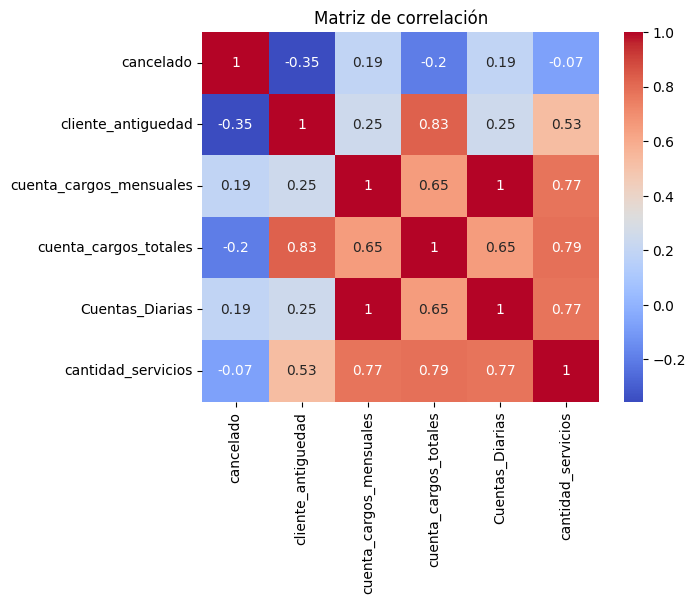

In [87]:
corr = clientes[['cancelado', 'cliente_antiguedad', 'cuenta_cargos_mensuales', 'cuenta_cargos_totales', 'Cuentas_Diarias', 'cantidad_servicios']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Matriz de correlaci√≥n')
plt.show()